# Diagnosing MAGICC's TCR, ECS and TCRE

In [1]:
# NBVAL_IGNORE_OUTPUT
from datetime import datetime

from pymagicc.core import MAGICC6, MAGICC7

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

## Basic usage

The simplest and fastest option is to simply all the `diagnose_tcr_ecs_tcre` method of the MAGICC instance and read out the results. 

In [3]:
with MAGICC6() as magicc:
    # you can tweak whatever parameters you want in 
    # MAGICC6/run/MAGCFG_DEFAULTALL.CFG, here's a few
    # examples that might be of interest
    results = magicc.diagnose_tcr_ecs_tcre(
        CORE_CLIMATESENSITIVITY=2.75,
        CORE_DELQ2XCO2=3.65,
        CORE_HEATXCHANGE_LANDOCEAN=1.5,
    )
print("TCR is {tcr:.4f}K, ECS is {ecs:.4f}K and TCRE is {tcre:.6f} K / GtC".format(**results))

TCR is 1.8517K, ECS is 2.7502K and TCRE is 0.002149 K / GtC


If we wish, we can alter the MAGICC instance's parameters before calling the `diagnose_tcr_ecs` method. 

In [4]:
with MAGICC6() as magicc:
    results_default = magicc.diagnose_tcr_ecs_tcre()
    results_low_ecs = magicc.diagnose_tcr_ecs_tcre(
        CORE_CLIMATESENSITIVITY=1.5
    )
    results_high_ecs = magicc.diagnose_tcr_ecs_tcre(
        CORE_CLIMATESENSITIVITY=4.5
    )

print("Default TCR is {tcr:.4f}K, ECS is {ecs:.4f}K and TCRE is {tcre:.6f} K / GtC".format(**results_default))
print("Low TCR is {tcr:.4f}K, ECS is {ecs:.4f}K and TCRE is {tcre:.6f} K / GtC".format(**results_low_ecs))
print("High TCR is {tcr:.4f}K, ECS is {ecs:.4f}K and TCRE is {tcre:.6f} K / GtC".format(**results_high_ecs))

Default TCR is 1.9734K, ECS is 2.9968K and TCRE is 0.002290 K / GtC
Low TCR is 1.1942K, ECS is 1.5056K and TCRE is 0.001386 K / GtC
High TCR is 2.5229K, ECS is 4.4384K and TCRE is 0.002928 K / GtC


## Making a plot

The output also includes the timeseries that were used in the diagnosis experiment. Hence we can use the output to make a plot.

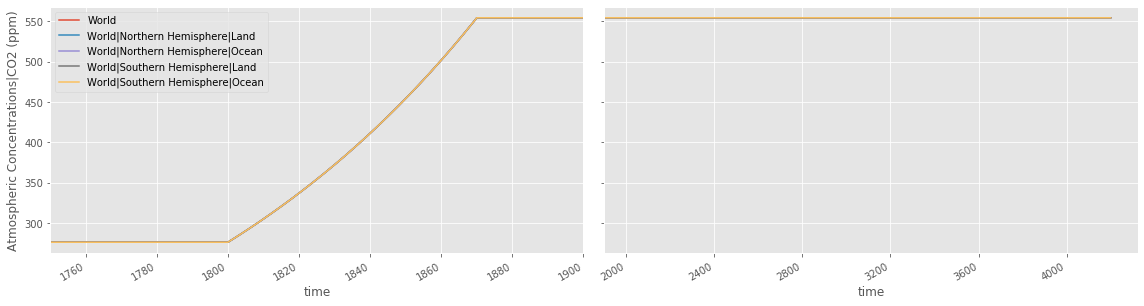

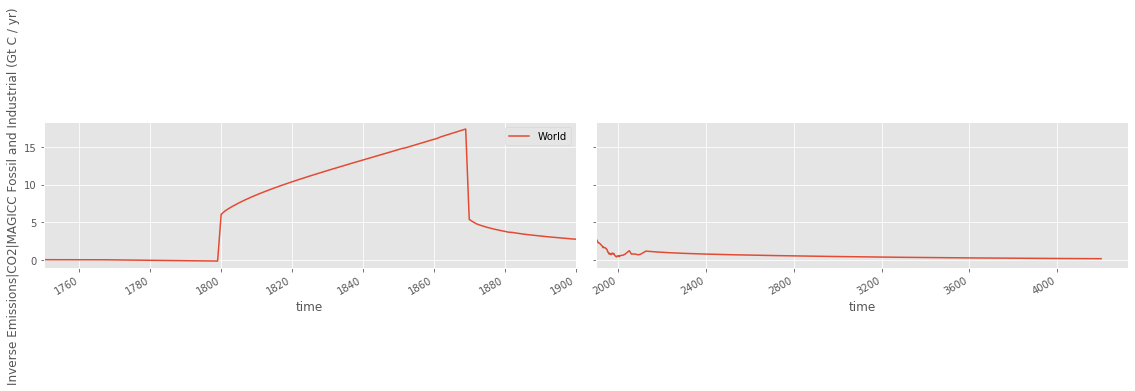

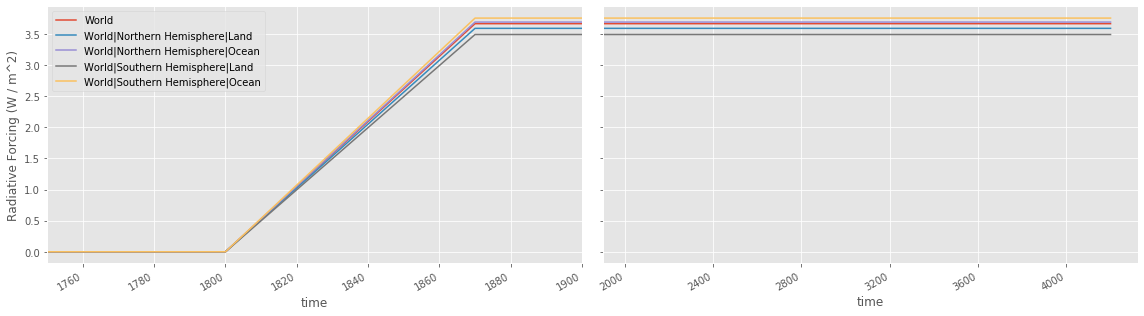

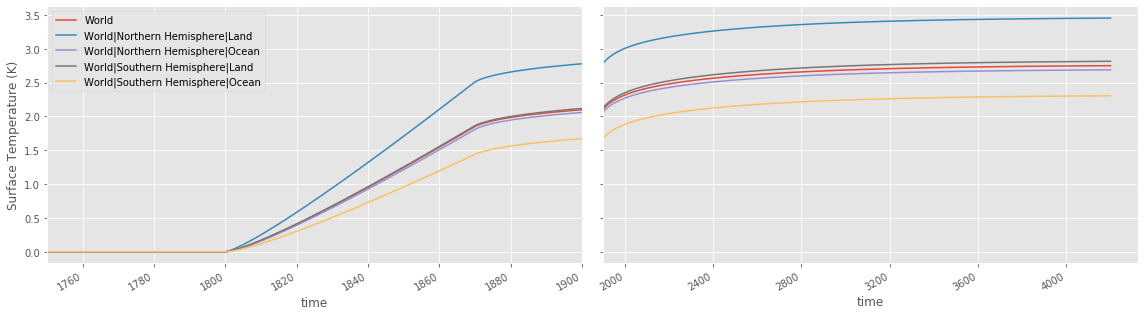

In [5]:
join_time = datetime(1900, 1, 1)

for label, df in results["timeseries"].to_iamdataframe().data.groupby("variable"):
    fig, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 4.5))
    unit = df["unit"].unique()[0]

    for rlabel, rdf in df.groupby("region"):
        rdf.plot(x="time", y="value", ax=axes[0], label=rlabel)
        rdf.plot(x="time", y="value", ax=axes[1], label=rlabel)
        
    axes[0].set_xlim([datetime(1750, 1, 1), join_time])
    axes[0].set_ylabel("{} ({})".format(label, unit))

    axes[1].set_xlim(left=join_time)
    axes[1].legend_.remove()

    fig.tight_layout()